-7.4109505132425095
predicted [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
-0.32415192978430013
predicted [[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
-0.12854676198196646
predicted [[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
-0.07346457293954567
predicted [[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
-0.049758722646258094
predicted [[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
final classification rate: 1.0


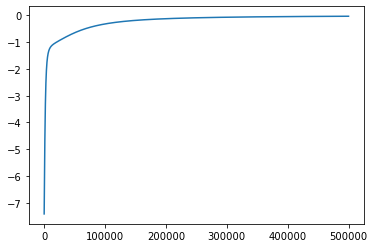

In [9]:

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future
import numpy as np
import matplotlib.pyplot as plt

# for binary classification! no softmax here

def forward(X, W1, b1, W2, b2):
    # sigmoid
    Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))
    # tanh
    # Z = np.tanh(X.dot(W1) + b1)

    # relu
    #Z = X.dot(W1) + b1
    #Z = Z * (Z > 0)
    #a = np.exp(Z.dot(W2) + b2)
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    #Y = np.exp(activation)
    return Y,Z

def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)

def derivative_w2(Z, T, Y):
    # Z is (N, M)
    return Z.T.dot(T - Y)

def derivative_b2(T, Y):
    return (T - Y).sum(axis = 0)

def derivative_w1(X, Z, T, Y, W2):
    dZ = (T-Y).dot(W2.T) * Z * (1 - Z) # this is for sigmoid activation
    #dZ =  (T-Y).dot(W2.T) * (1 - Z * Z) # this is for tanh activation
    #dZ = (T-Y).dot(W2.T) * Z *(1 - Z) # this is for relu activation
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    dZ = (T-Y).dot(W2.T) * Z * (1 - Z) # this is for sigmoid activation
    #dZ = (T-Y).dot(W2.T) * (1 - Z * Z) # this is for tanh activation
    #dZ = (T-Y).dot(W2.T) * Z *(1 - Z) # this is for relu activation
    return dZ.sum(axis=0)

def get_log_likelihood(T, Y):
    return np.sum(T*np.log(Y))

def test_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 1]).reshape(4,1)
    W1 = np.random.randn(2, 8)
    b1 = np.zeros(8)
    W2 = np.random.randn(8,2)
    b2 = np.zeros(2)
    LL = [] # keep track of log-likelihoods
    learning_rate = 0.0001
    regularization = 0.
    last_error_rate = None
    for i in range(500000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = get_log_likelihood(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)

        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 100000 == 0:
            print(ll)
            #print("actual",Y)
            print("predicted",prediction)

    print("final classification rate:", np.mean(prediction == Y))
    plt.plot(LL)
    plt.show()


if __name__ == '__main__':
     test_xor()
